#### Bowtie2 output: filtering out human reads

$ bowtie2 -p 4 --very-fast --no-unal -x /data/hq19/hg19 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq


1124714 reads; of these:

    1124714 (100.00 percent) were unpaired; of those:
    
        1028379 (91.43 percent) aligned 0 times
        
        87274 (7.76 percent) aligned exactly 1 time
        
        9061 (0.81 percent) aligned >1 times
        
8.57 percent overall alignment rate

It seems like 8.57 percent of the reads came from human DNA, since they aligned with the human genome.

unaligned.fastq should contain all the non-human-contaminated reads. Filtering these out was our goal, so this is good.

#### Bowtie2 output: aligning filtered reads to S. oneidensis (--very-fast)

$ bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -S oneidensisNC.sam --un unalignedNC.fastq


1028379 reads; of these:

    1028379 (100.00 percent) were unpaired; of those:
    
        299560 (29.13 percent) aligned 0 times
        
        687571 (66.86 percent) aligned exactly 1 time
        
        41248 (4.01 percent) aligned >1 times
        
70.87 percent overall alignment rate

unalignedNC.fastq will contain all the reads that didn't align to the human genome or the S. oneidensis genome (with the --very-fast setting).

Hopefully increasing the sensitivity will decrease the percentage of reads that didn't align.

#### Bowtie2 output: aligning filtered reads to S. oneidensis (--very-sensitive)

$ bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -S oneidensisNC.sam --un unalignedNC.fastq


1028379 reads; of these:

    1028379 (100.00 percent) were unpaired; of those:
    
        299560 (29.13 percent) aligned 0 times
        
        687571 (66.86 percent) aligned exactly 1 time
        
        41248 (4.01 percent) aligned >1 times
        
70.87 percent overall alignment rate

Using the --very-sensitive setting produced the same exact results as the --very-fast setting, so the percentage of reads that didn't align (29.13 percent) is likely accurate.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import normal, rand
import csv

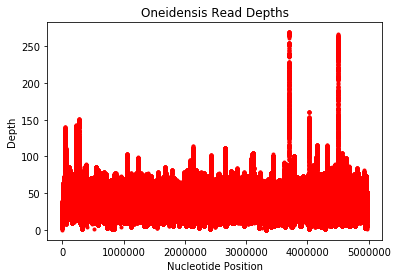

In [9]:
x = []
depths = []

with open('oneidensisNC.tab','r') as oneidensis:
    plots = csv.reader(oneidensis, delimiter='\t')
    for row in plots:
        x.append(int(row[1]))
        depths.append(int(row[2]))        

plt.plot(x, depths,'r.')
plt.title("Oneidensis Read Depths")  
plt.xlabel("Nucleotide Position") 
plt.ylabel("Depth")
plt.show() 

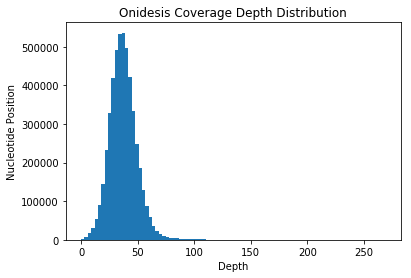

In [10]:
plt.hist(depths, bins= 90)
plt.title("Onidesis Coverage Depth Distribution")  
plt.xlabel("Depth") 
plt.ylabel("Nucleotide Position")
plt.show()

In [12]:
print(max(depths))

print(min(depths))

#mean depth
print(sum(depths)/len(depths))

269
0
36.955644792125895


In [ ]:
x2 = []
depths2 = []

with open('humanNC.tab','r') as human:
    plots = csv.reader(human, delimiter='\t')
    for row in plots:
        x2.append(int(row[1]))
        depths2.append(int(row[2]))        

plt.plot(x2, depths2,'r.')
plt.title("Human Read Depths")  
plt.xlabel("Nucleotide Position") 
plt.ylabel("Depth")
plt.show() 

humanNC.tab was ~50GB compared to oneidensisNC.tab's ~108MB, so the cell would not run with the above code